# Sale Analysis

Import Necessary Libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Step 1: Getting the Data
Task #1: Merging 12 Months of sales data into a single file 'all_data.csv'

In [77]:
# get all csv files
files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

# concate all files into single dataframe
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

# save file
all_months_data.to_csv('all_data.csv', index = False)
    

Read in updated dataframe

In [78]:
df = pd.read_csv('all_data.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In this dataset, columns as the following:

* 'Order ID': Identification number for orders.
* 'Product': Name of Product.
* 'Quantity Ordered': Number of items requested.
* 'Price Each': The price per item.
* 'Order Date': When the order was placed. (Time & date)
* 'Purchase Address': Contact information for purchases.

In [79]:
df.shape

(186850, 6)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Step 2: Analyzing Data
**EDA (Exploratory Data Analysis)**


Exploring the descriptive statistics of the variables

In [81]:
#include='all' shows all numerical and string values
df.describe(include='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [82]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

## Step 3: Preprocessing (prepare data)

In [83]:
# all unique value for columns
for i in df.columns:
    print(df[i].unique())

['176558' nan '176559' ... '259355' '259356' '259357']
['USB-C Charging Cable' nan 'Bose SoundSport Headphones' 'Google Phone'
 'Wired Headphones' 'Macbook Pro Laptop' 'Lightning Charging Cable'
 '27in 4K Gaming Monitor' 'AA Batteries (4-pack)'
 'Apple Airpods Headphones' 'AAA Batteries (4-pack)' 'iPhone'
 'Flatscreen TV' '27in FHD Monitor' '20in Monitor' 'LG Dryer'
 'ThinkPad Laptop' 'Vareebadd Phone' 'LG Washing Machine'
 '34in Ultrawide Monitor' 'Product']
['2' nan '1' '3' '5' 'Quantity Ordered' '4' '7' '6' '8' '9']
['11.95' nan '99.99' '600' '11.99' '1700' '14.95' '389.99' '3.84' '150'
 '2.99' '700' '300' '149.99' '109.99' '600.0' '999.99' '400' '379.99'
 'Price Each' '700.0' '1700.0' '150.0' '300.0' '400.0']
['04/19/19 08:46' nan '04/07/19 22:30' ... '09/23/19 07:39'
 '09/19/19 17:30' '09/30/19 00:18']
['917 1st St, Dallas, TX 75001' nan '682 Chestnut St, Boston, MA 02215'
 ... '981 4th St, New York City, NY 10001'
 '840 Highland St, Los Angeles, CA 90001'
 '220 12th St, San Franc

 **Augment data with additional columns**
 
 **Task #2: Add Month Column**

In [84]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'].unique()

array(['04', nan, '05', 'Or', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [85]:
# Find 'OR' and delete it.
df['Month'] = df['Month'].replace('Or', np.NaN)

In [86]:
# Drop duplicates & NaN values from DataFrame and reset index 
df.drop_duplicates(inplace = True)
df.dropna(axis = 0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [87]:
df['Month'] = pd.to_numeric(df['Month'])

In [88]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

**Task 3: Add a sales column**

In [89]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Task 4: Add a city and state column

In [90]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: get_city(x) + " (" + get_state(x) + ")")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


Question #1: What was the best month for sales? How much was earned that month?

In [91]:
data_sales = df.groupby('Month').sum(numeric_only=True)
data_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10893,1810924.81,1821413.16
2,13431,2186940.38,2200078.08
3,16979,2789084.64,2804973.35
4,20536,3366218.76,3389217.98
5,18653,3133134.61,3150616.23
6,15234,2560503.50,2576280.15
7,16054,2631225.12,2646461.32
8,13429,2226963.90,2241083.37
9,13091,2081897.65,2094465.69


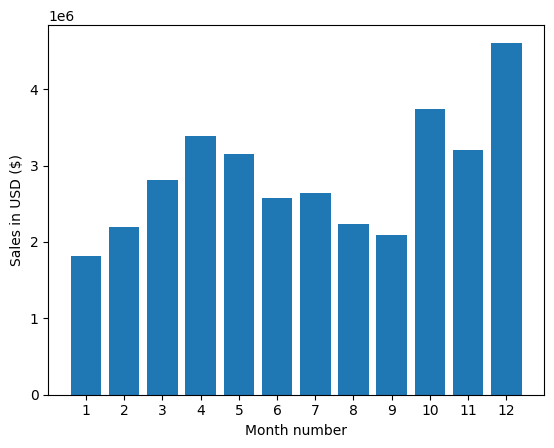

<Figure size 1500x2000 with 0 Axes>

In [97]:
months = range(1,13)
plt.bar(months, data_sales['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month number")
plt.show()

Question #2: What city sold the most product?

In [93]:
data_city = df.groupby('City').sum(numeric_only=True)
data_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16584,2778608.69,104649,2794199.07
Austin (TX),11137,1808340.03,69720,1818044.33
Boston (MA),22494,3634398.40,140898,3658627.65
Dallas (TX),16707,2750026.38,104447,2765373.96
Los Angeles (CA),33247,5417171.70,208020,5448304.28
New York City (NY),27903,4632920.54,175557,4661867.14
Portland (ME),2746,446752.36,17119,449321.38
Portland (OR),11291,1859836.44,70517,1870010.56
San Francisco (CA),50169,8204001.38,314949,8254743.55


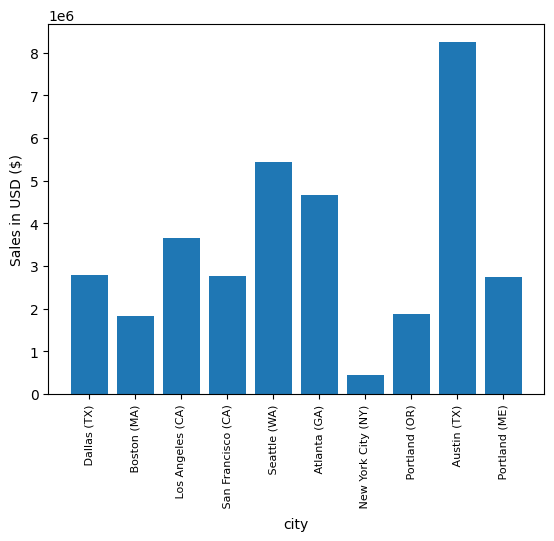

In [100]:
cities = df['City'].unique()
plt.bar(cities, data_city['Sales'])
plt.xticks(cities, rotation = 'vertical' , size = 8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("city")
plt.show()

Question #3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?